# Exploratory Data Analysis(EDA)

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from termcolor import colored
import warnings

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV

In [2]:
# Load data & display first few rows
data=pd.read_csv('Clean_Dataset.csv')
data.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [3]:
data.shape

(300153, 12)

In [4]:
# Remove Unwanted column
data=data.drop('Unnamed: 0',axis=1)

In [5]:
data.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [6]:
# Statistical description about the data
data.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [7]:
# Quick detailed info about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [8]:
# Check for null values
data.isna().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [9]:
# Drop rows with any NaN values
data.dropna()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [10]:
# Column renaming
data.rename(columns={'class': 'flight_class'}, inplace=True)

In [11]:
# Over the columns of the DataFrame, printing each column's index and name.
for index, value in enumerate(data.columns) :
    print(index, ":", value)

0 : airline
1 : flight
2 : source_city
3 : departure_time
4 : stops
5 : arrival_time
6 : destination_city
7 : flight_class
8 : duration
9 : days_left
10 : price


In [12]:
# Counts the occurrences of each unique value in the "airline" column
data.airline.value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

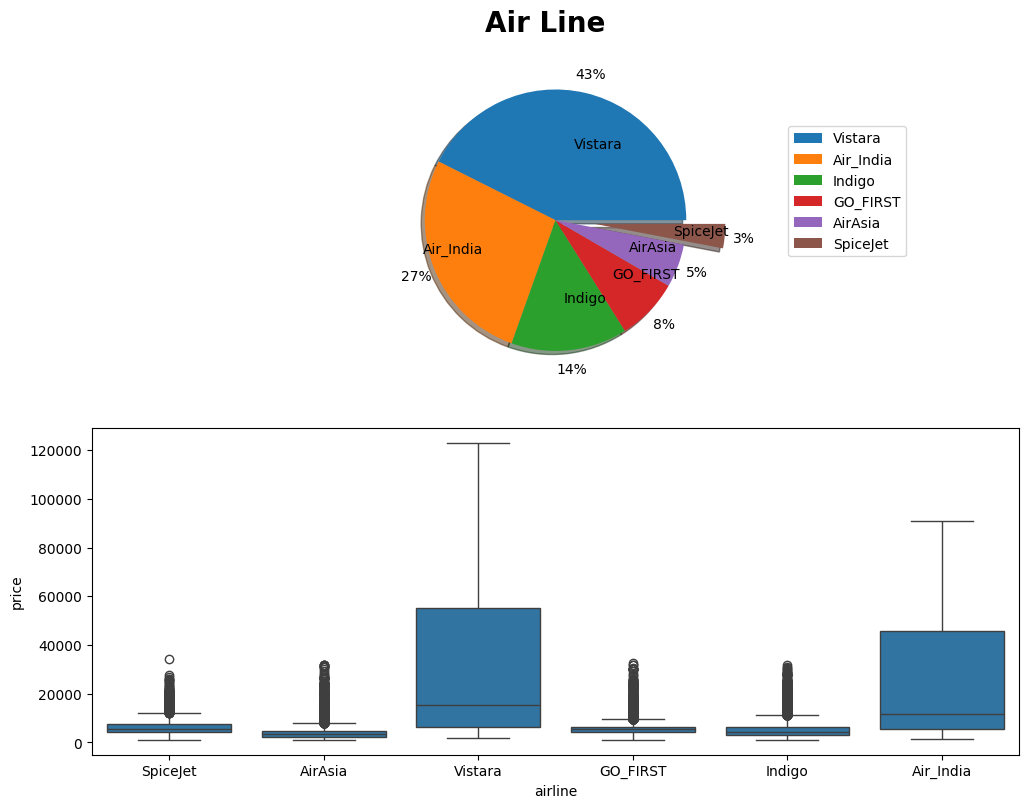

In [13]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
fig.suptitle('Air Line', fontsize=20, fontweight='bold')
plt.tight_layout()
# Top ax
labels = data.airline.value_counts().index.tolist()
explode = (0, 0, 0, 0, 0, 0.3)
ax[0].pie(data.airline.value_counts(), autopct='%.f%%', labels=labels, shadow=True, pctdistance=1.15, labeldistance=0.6, explode=explode)
ax[0].legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=5)

# Bottom ax
sns.boxplot(x='airline', y='price', data=data, ax=ax[1])

plt.show()

Here is a subplot with two plots vertically aligned:
1. A pie chart on the top showing the distribution of airline counts, with custom formatting for labels and explosion effect.
2. A boxplot on the bottom showing the distribution of prices across different airlines in the DataFram'data'

Most used airline is Vistara (43% of all flights, 127859 flights)             
Second place is Air_India (27% of all flights, 80892 flights)                  
Less used airline is SpiceJet (3% of all flights, 9011 flights)

In [14]:
len(data.flight.value_counts())

1561

It's number of unique flights calculates by counting the occurrences of each flight and then finding the length of that count.

In [16]:
#  Unique values from the 'flight' column
data['flight'].unique()

array(['SG-8709', 'SG-8157', 'I5-764', ..., '6E-7127', '6E-7259',
       'AI-433'], dtype=object)

In [17]:
data['flight'].value_counts()

flight
UK-706     3235
UK-772     2741
UK-720     2650
UK-836     2542
UK-822     2468
           ... 
SG-9923       1
6E-6474       1
6E-865        1
G8-705        1
G8-107        1
Name: count, Length: 1561, dtype: int64

In [18]:
# The number of unique values for each column in the DataFrame
data.nunique()

airline                 6
flight               1561
source_city             6
departure_time          6
stops                   3
arrival_time            6
destination_city        6
flight_class            2
duration              476
days_left              49
price               12157
dtype: int64

Becase of larg values of unique values, i can not plot this column.            
Flight name is lika ID, so its not nessasary for modeling and will drop from dataframe

In [19]:
data.drop(columns='flight', inplace=True)

In [21]:
data.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,flight_class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [22]:
# Counts the occurrences of each unique value in the "source_city" column
data.source_city.value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

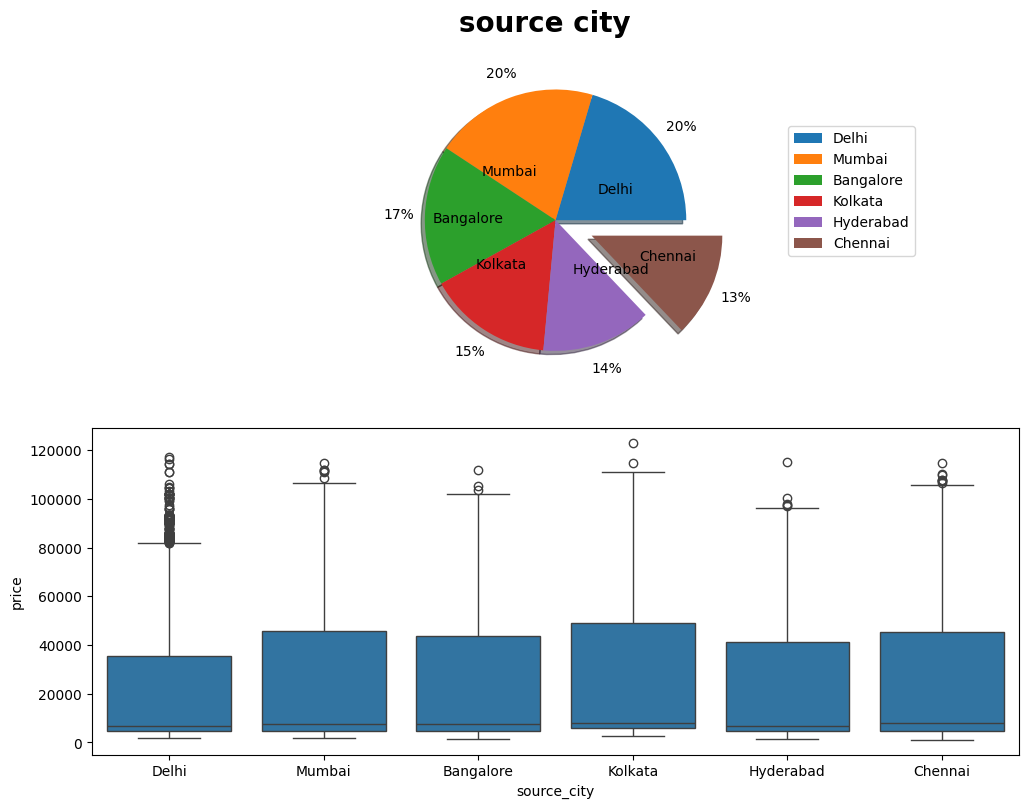

In [23]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
fig.suptitle('source city', fontsize=20, fontweight='bold')
plt.tight_layout()
# Top ax
labels = data.source_city.value_counts().index.tolist()
explode = (0, 0, 0, 0, 0, 0.3)
ax[0].pie(data.source_city.value_counts(), autopct='%.f%%', labels=labels, shadow=True, pctdistance=1.2, labeldistance=0.4, explode=explode)
ax[0].legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=5)

# Bottom ax
sns.boxplot(x='source_city', y='price', data=data, ax=ax[1])
plt.show()

Almost number of all flights source is equal.

Here is a figure with two vertically stacked plots:

1. A pie chart displaying the distribution of flight counts for each source city in the data DataFrame. It includes labels, a shadow effect, and one segment slightly exploded for emphasis.

2. A boxplot showing the distribution of flight prices for each source city, providing insights into price variations across different cities.

Output : Almost number of all flights source is equal.

In [25]:
# Counts the occurrences of each unique value in the "departure_time" column
data.departure_time.value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

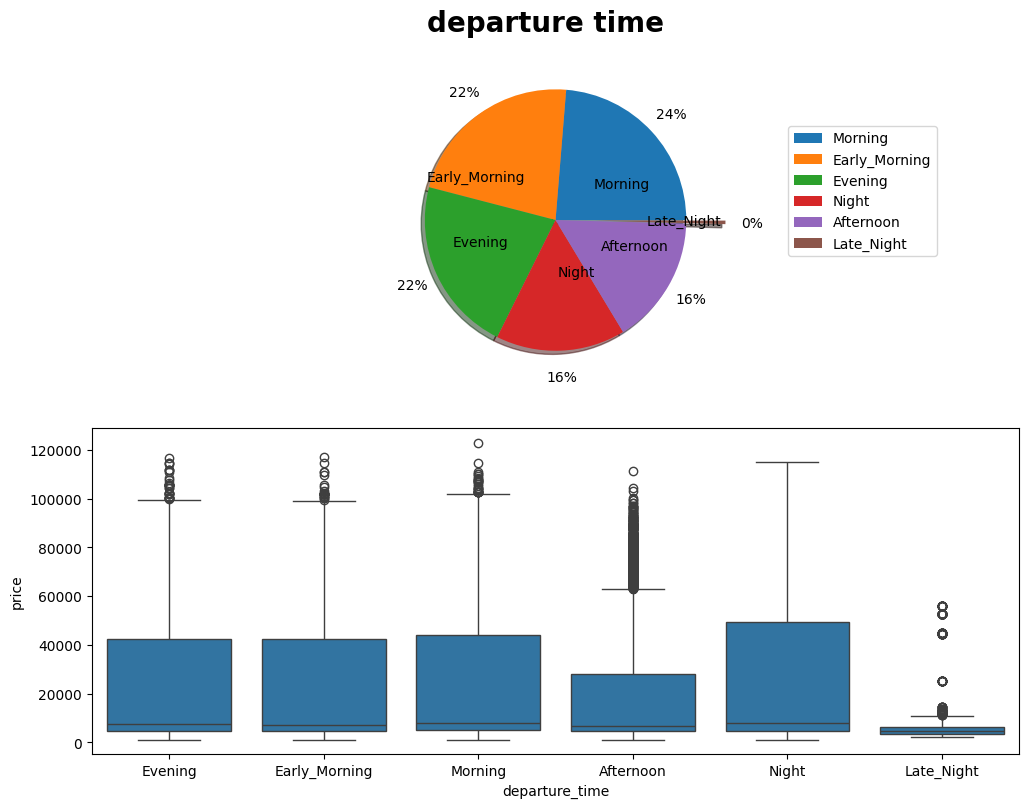

In [26]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
fig.suptitle('departure time', fontsize=20, fontweight='bold')
plt.tight_layout()
# Top ax
labels = data.departure_time.value_counts().index.tolist()
explode = (0, 0, 0, 0, 0, 0.3)
ax[0].pie(data.departure_time.value_counts(), autopct='%.f%%', labels=labels, shadow=True, pctdistance=1.2, labeldistance=0.4, explode=explode)
ax[0].legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=5)

# Bottom ax
sns.boxplot(x='departure_time', y='price', data=data, ax=ax[1])
plt.show()

Here is a figure with two vertically arranged plots, analyzing the "departure_time" column in the `data` DataFrame:

1. A pie chart that displays the percentage distribution of flights by departure time, with labels, a shadow effect, and one segment exploded for emphasis.

2. A boxplot that illustrates the distribution of flight prices for each departure time, showing how prices vary at different times.

Output: Except at the end of Late_Night, the frequency of the rest of the departure_time is almost equal.

In [27]:
# Unique value in the "stops" column
data.stops.value_counts()

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

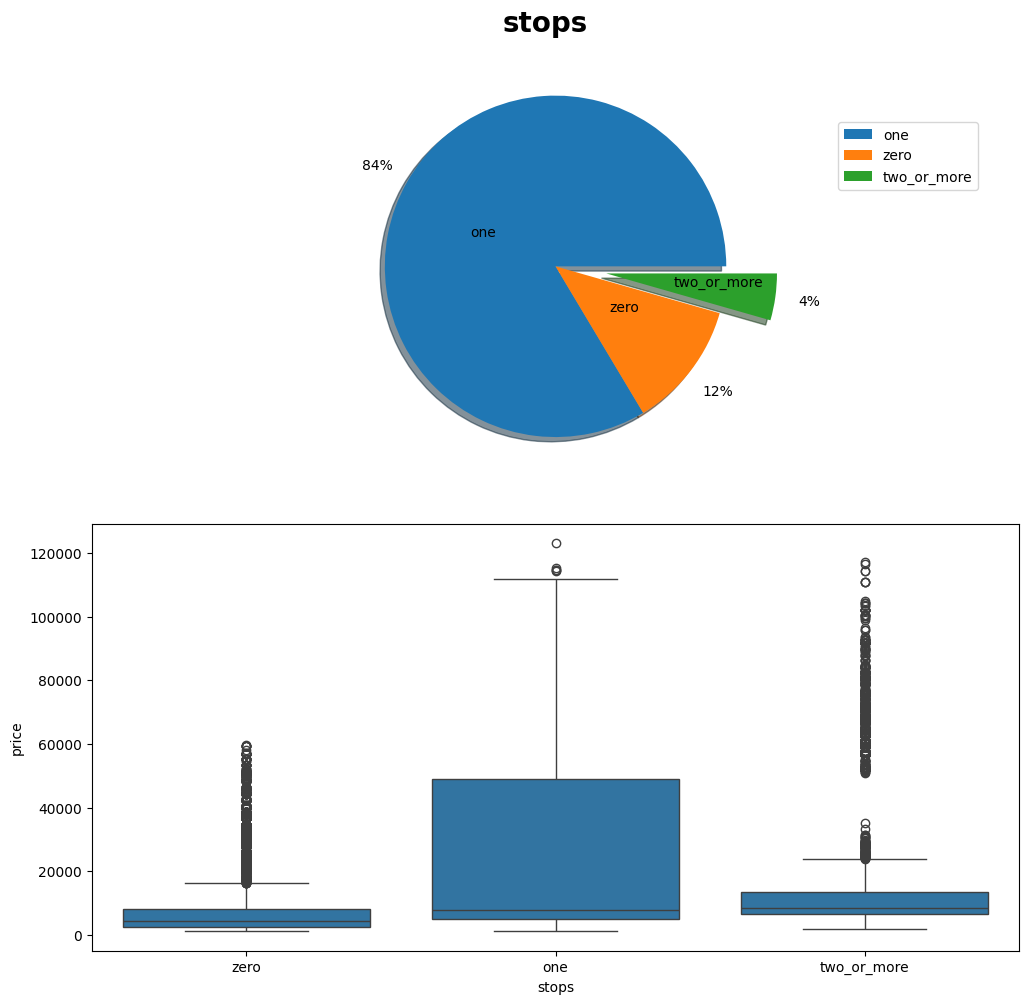

In [28]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
fig.suptitle('stops', fontsize=20, fontweight='bold')
plt.tight_layout()
# Top ax
labels = data.stops.value_counts().index.tolist()
explode = (0, 0, 0.3)
ax[0].pie(data.stops.value_counts(), autopct='%.f%%', labels=labels, shadow=True, pctdistance=1.2, labeldistance=0.4, explode=explode)
ax[0].legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=5)

# Bottom ax
sns.boxplot(x='stops', y='price', data=data, ax=ax[1])
plt.show()

Here is a figure with two vertically stacked plots, focusing on the "stops" column

1. A pie chart that shows the percentage distribution of flights based on the number of stops, with labels, shadow, and one segment exploded for emphasis.

2. A boxplot that displays the distribution of flight prices for different numbers of stops, illustrating how prices vary with the number of stops.

Output: 
Most of the flights have 1 stop (about 84% , 250863 flights).                             


Just 4% of flights have 2 or more than 2 stops during their flights.         

About 12% of flights have not any stop.(13286 flights)

In [29]:
# Unique value in the "arrival_time.value" column
data.arrival_time.value_counts()

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64

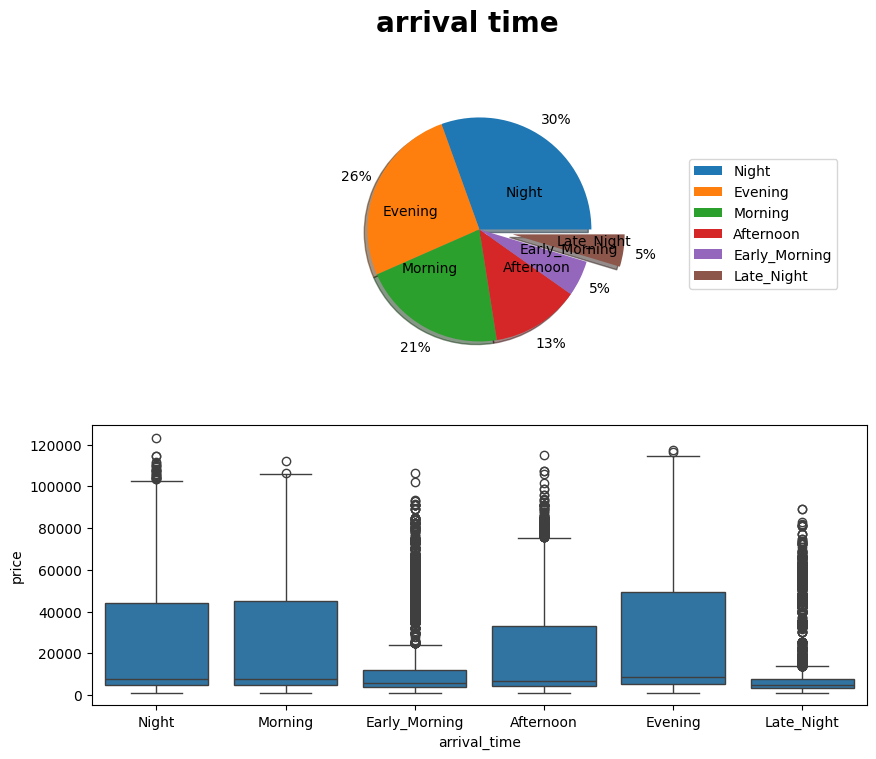

In [30]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
fig.suptitle('arrival time', fontsize=20, fontweight='bold')
# Top ax
labels = data.arrival_time.value_counts().index.tolist()
explode = (0, 0, 0, 0, 0, 0.3)
ax[0].pie(data.arrival_time.value_counts(), autopct='%.f%%', labels=labels, shadow=True, pctdistance=1.2, labeldistance=0.4, explode=explode)
ax[0].legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=5)

# Bottom ax
sns.boxplot(x='arrival_time', y='price', data=data, ax=ax[1])
plt.show()

Here a figure with two vertically stacked plots, focusing on the "arrival_time" column

1. A pie chart displaying the percentage distribution of flights by arrival time, with labels, a shadow effect, and one segment exploded for emphasis.

2. A boxplot showing the distribution of flight prices for each arrival time, illustrating how prices vary at different arrival times.


In [32]:
# Unique value in the "destination_city" column
data.destination_city.value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

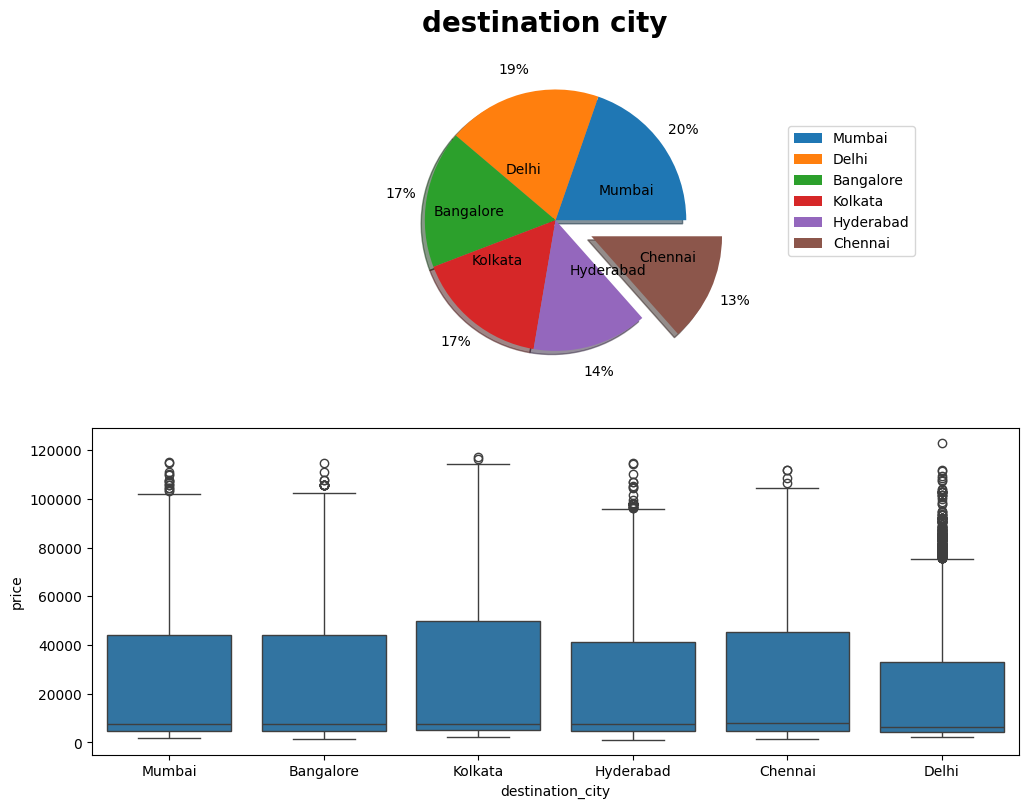

In [33]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
fig.suptitle('destination city', fontsize=20, fontweight='bold')
plt.tight_layout()
# Top ax
labels = data.destination_city.value_counts().index.tolist()
explode = (0, 0, 0, 0, 0, 0.3)
ax[0].pie(data.destination_city.value_counts(), autopct='%.f%%', labels=labels, shadow=True, pctdistance=1.2, labeldistance=0.4, explode=explode)
ax[0].legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=5)

# Bottom ax
sns.boxplot(x='destination_city', y='price', data=data, ax=ax[1])
plt.show()

This figure provides insights into:

1. Pie Chart: The distribution of flights by destination city, showing the proportion of flights to each city. This helps identify the most common destinations.

2. Boxplot: The distribution of flight prices for each destination city, revealing price variations and potential outliers. This can help identify which cities have higher or lower average prices.

In [35]:
# Unique value in the "flight_class" column
data.flight_class.value_counts()

flight_class
Economy     206666
Business     93487
Name: count, dtype: int64

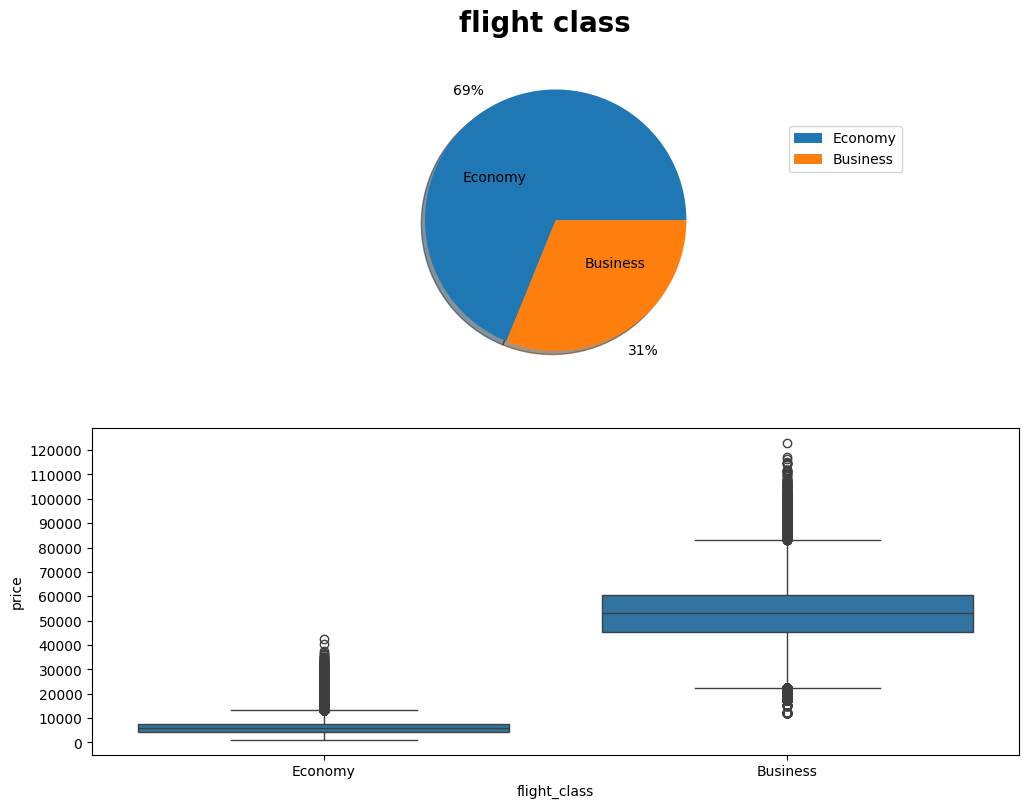

In [37]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
fig.suptitle('flight class', fontsize=20, fontweight='bold')
plt.tight_layout()
# Top ax
labels = data.flight_class.value_counts().index.tolist()
# explode = (0, 0, 0, 0, 0, 0.3)
ax[0].pie(data.flight_class.value_counts(), autopct='%.f%%', labels=labels, shadow=True, pctdistance=1.2, labeldistance=0.4)
ax[0].legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=5)

# Bottom ax
sns.boxplot(x='flight_class', y='price', data=data, ax=ax[1]).set_yticks(np.arange(0, 130000, 10000))
plt.show()

Abviously Business classes are more expesive than Economie .                   
Most of flights are Economy (about 69%).

In [38]:
#total count of distinct durations
len(data.duration.value_counts())

476

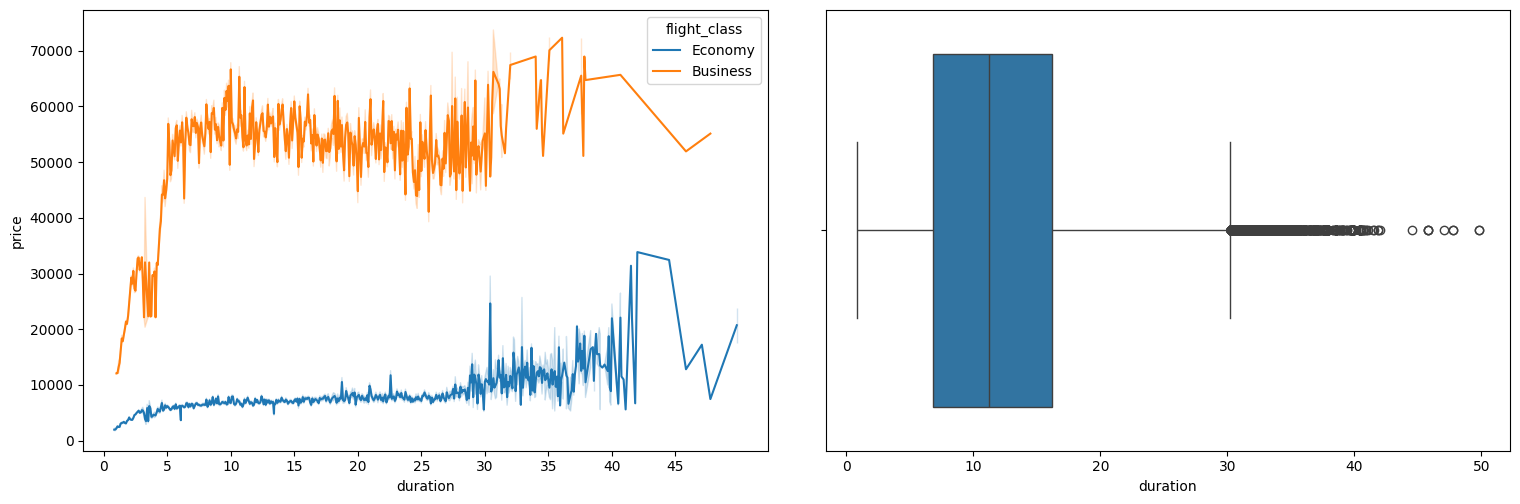

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
plt.tight_layout()
# Left ax
sns.lineplot(x='duration', y='price', data=data, ax=ax[0], hue='flight_class').set_xticks(np.arange(0, 50, 5))
# Right AX
sns.boxplot(data=data, x='duration', ax=ax[1])
plt.show()

Here is a figure with two plots side by side:

Line Plot:

- Uses Seaborn's lineplot function to plot the relationship between duration (flight duration) on the x-axis and price (flight price) on the y-axis.
- The plot is segmented by flight_class, meaning each line represents a different flight class (like economy, business, etc.).
- set_xticks(np.arange(0, 50, 5)) sets the x-axis ticks to be at intervals of 5 from 0 to 50, ensuring clear spacing and readability.

Box Plot:

- Uses Seaborn's boxplot function to display the distribution of flight prices (price) across different durations (duration).
- Each box represents the interquartile range (IQR) of prices for flights of a particular duration, with whiskers indicating the range of data excluding outliers.

In Business class, from 1 to 5 hours, price growth sharply.                    
In Business class for durations more than 5, Price in a channel between 45000 to 60000.                                                                    
In Economy class growth of price have a linear growth and for duration=47 have a sharp raise in prices


.
Overall, this visualization combination provides insights into how flight prices vary with duration and how this relationship differs across flight classes.

In [41]:
# Unique value in the "days_left" column
len(data.days_left.value_counts())

49

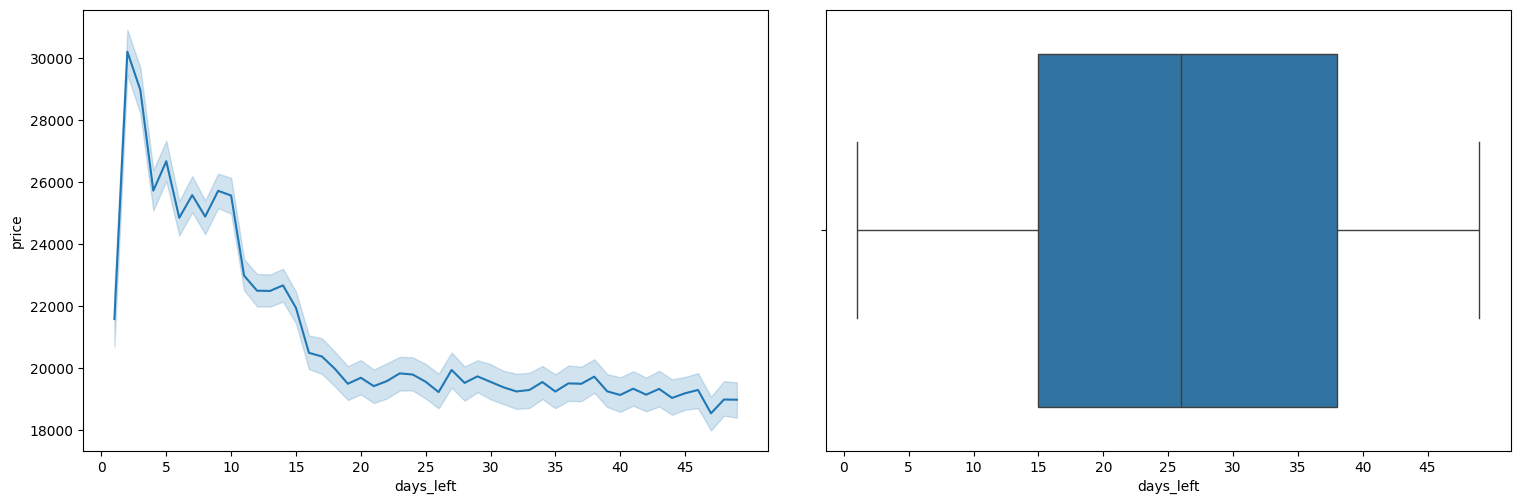

In [42]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
plt.tight_layout()
# Left ax
sns.lineplot(x='days_left', y='price', data=data, ax=ax[0]).set_xticks(np.arange(0, 50, 5))
# Right AX
sns.boxplot(data=data, x='days_left', ax=ax[1]).set_xticks(np.arange(0, 50, 5))
plt.show()

Line Plot:

- Uses Seaborn's lineplot function to plot the relationship between days_left (number of days left until departure) on the x-axis and price (flight price) on the y-axis.
- set_xticks(np.arange(0, 50, 5)) sets the x-axis ticks to be at intervals of 5 from 0 to 50, ensuring clear spacing and readability.

Box Plot:

- Uses Seaborn's boxplot function to display the distribution of flight prices (price) across different values of days_left.
- set_xticks(np.arange(0, 50, 5)) also sets the x-axis ticks for the boxplot, ensuring alignment with the line plot for easy comparison.

Both plots together provide insights into how flight prices vary with the number of days left until departure, highlighting any trends or patterns in pricing based on booking timing.

The earlier you book your ticket, the less you will pay (for values greater than 2)

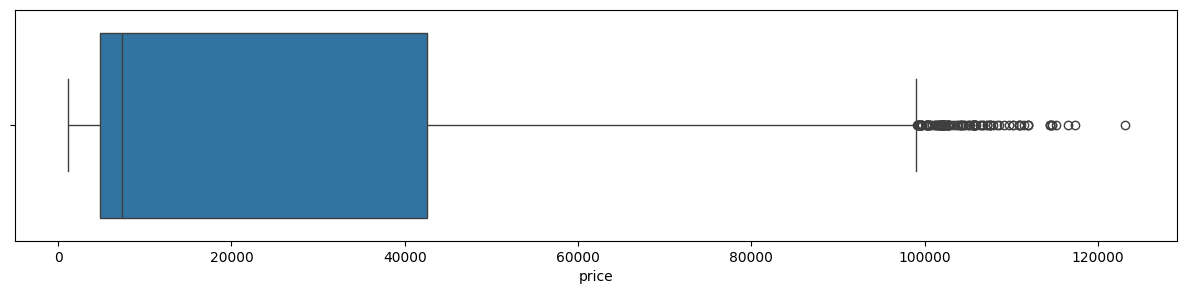

In [44]:
plt.figure(figsize=(15, 3))
sns.boxplot(data=data, x='price')
plt.show()

# Data Preprocessing
### Outlier Detection and Treatment using IQR method
#### 1. duration

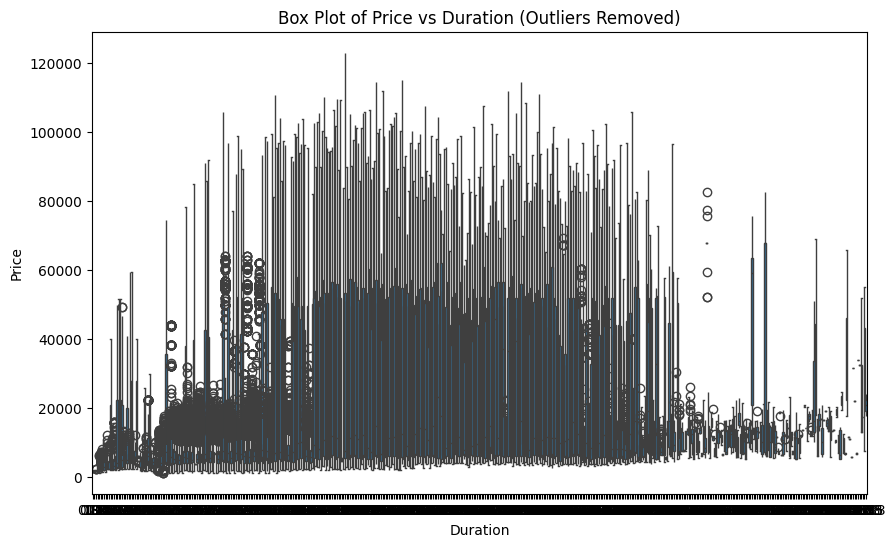

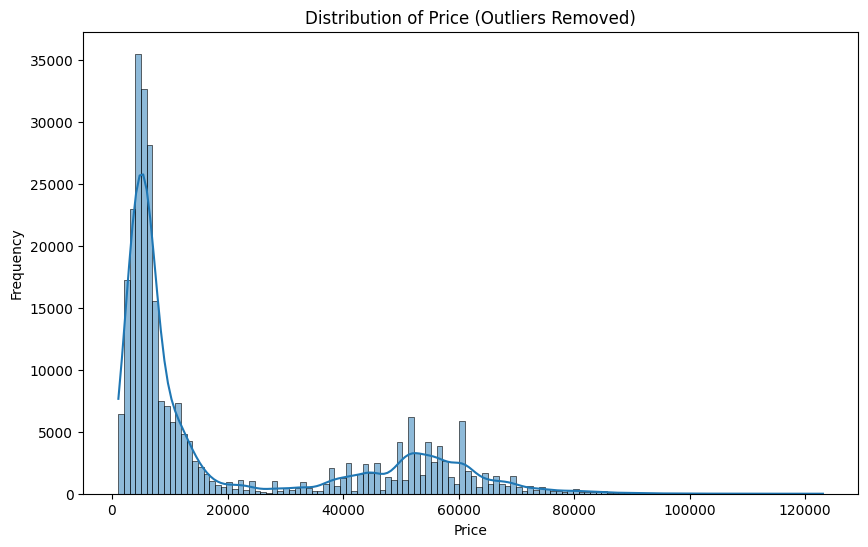

In [45]:
import matplotlib.pyplot as plt

def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Assuming 'data' is your dataframe containing flight information
# Replace 'duration' and 'price' with actual column names from your dataset
data_cleaned = data.groupby('duration').apply(lambda x: remove_outliers(x, 'price')).reset_index(drop=True)

# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='duration', y='price', data=data_cleaned)
plt.title('Box Plot of Price vs Duration (Outliers Removed)')
plt.xlabel('Duration')
plt.ylabel('Price')
plt.show()

# Distribution plot (histogram)
plt.figure(figsize=(10, 6))
sns.histplot(data=data_cleaned, x='price', kde=True)
plt.title('Distribution of Price (Outliers Removed)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

### Outlier Removal

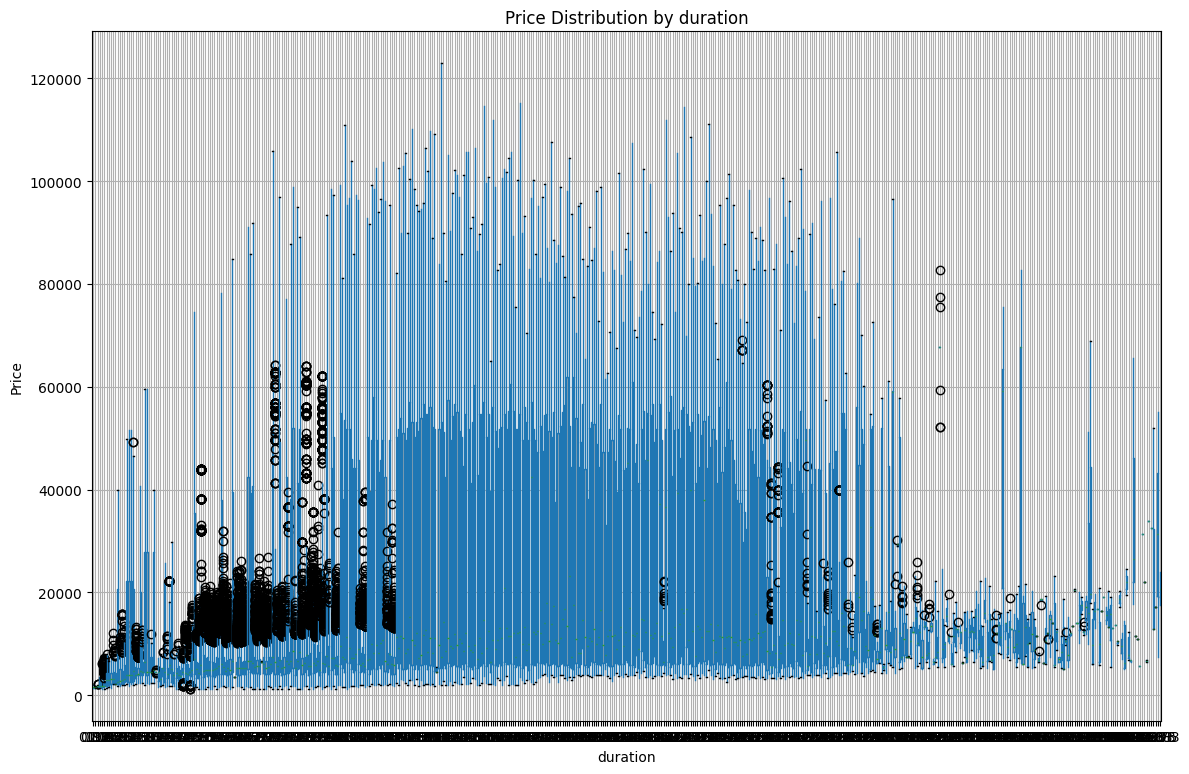

In [46]:
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Remove outliers from the 'price' column for each flight class
data_cleaned = data.groupby('duration').apply(lambda x: remove_outliers(x, 'price')).reset_index(drop=True)

# Plot the cleaned data
fig, ax = plt.subplots(figsize=(12, 8))

# Boxplot
data_cleaned.boxplot(column='price', by='duration', ax=ax)
ax.set_title('Price Distribution by duration')
ax.set_xlabel('duration')
ax.set_ylabel('Price')

plt.suptitle('')
plt.tight_layout()
plt.show()


#### 2. days_left

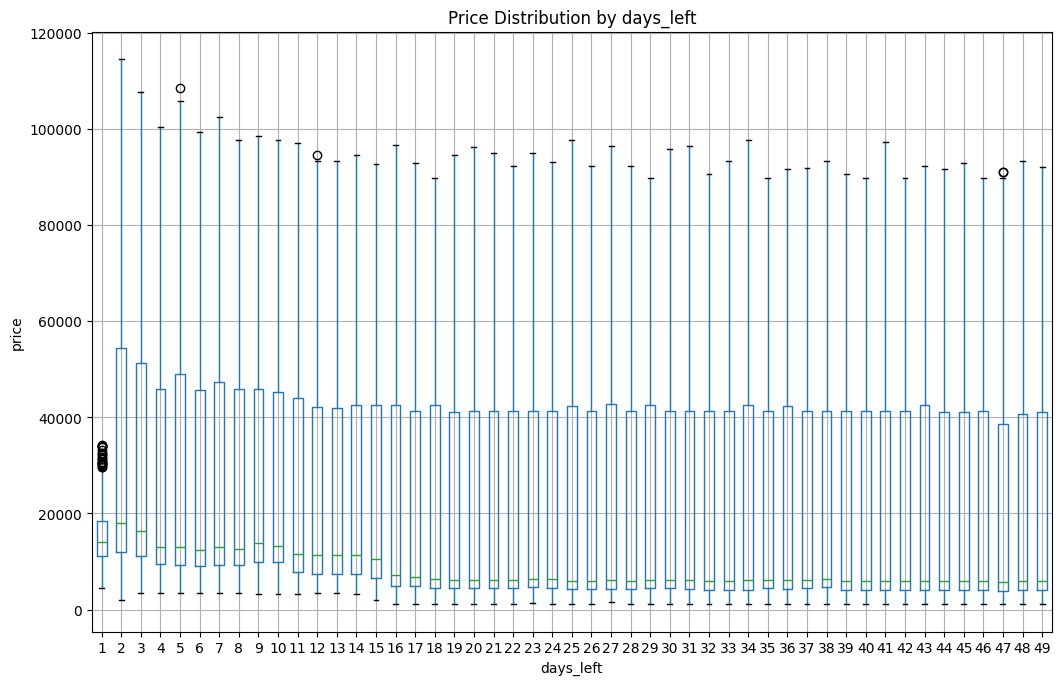

In [47]:
# Remove outliers from the 'price' column for each source city
data = data.groupby('days_left').apply(lambda x: remove_outliers(x, 'price')).reset_index(drop=True)

# Plot the cleaned data
fig, ax2 = plt.subplots(figsize=(12, 8))

# Boxplot
data.boxplot(column='price', by='days_left', ax=ax2)
ax2.set_title('Price Distribution by days_left')
ax2.set_xlabel('days_left')
ax2.set_ylabel('price')

plt.suptitle('')
plt.show()

### Converts the categorical values in the 'airline' column into numeric labels using LabelEncoder

In [48]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data['airline'] = encoder.fit_transform(data['airline'])

In [49]:
mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
mapping

{'AirAsia': 0,
 'Air_India': 1,
 'GO_FIRST': 2,
 'Indigo': 3,
 'SpiceJet': 4,
 'Vistara': 5}

In [50]:
# col : source_city
data.source_city = data.source_city.replace(
    {
        'Delhi' : 1,
        'Mumbai' : 2,
        'Bangalore' : 3,
        'Kolkata' : 4,
        'Hyderabad'  : 5,
        'Chennai' : 6,
        'Hyde' : 7
    }
)

In [51]:
# col : departure_time
data.departure_time = data.departure_time.replace(
    {
        'Morning' : 1,
        'Early_Morning' : 2,
        'Evening' : 3,
        'Night' : 4,
        'Afternoon' : 5,
        'Late_Night' : 6
    }
)

In [52]:

# col : stops
data.stops = data.stops.replace(
    {
        'one' : 1,
        'zero' : 2,
        'two_or_more' : 3
    }
)

In [53]:
# col : arrival_time
data.arrival_time = data.arrival_time.replace(
    {
        'Night' : 1,
        'Evening' : 2,
        'Morning' : 3,
        'Afternoon' : 4,
        'Early_Morning' : 5,
        'Late_Night' : 6
    }
)

In [54]:
# col : destination_city
data.destination_city = data.destination_city.replace(
    {
        'Mumbai' : 1,
        'Delhi' : 2,
        'Bangalore' : 3,
        'Kolkata' : 4,
        'Hyderabad' : 5,
        'Chennai' : 6
    }
)

In [55]:
# col : flight_class
data.flight_class = data.flight_class.replace(
    {
        'Economy' : 1,
        'Business' :2
    }
)

In [56]:
data.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,flight_class,duration,days_left,price
0,4,1,3,2,1,1,1,2.17,1,5953
1,4,1,2,2,3,1,1,2.33,1,5953
2,0,1,2,2,5,1,1,2.17,1,5956
3,5,1,1,2,4,1,1,2.25,1,5955
4,5,1,1,2,3,1,1,2.33,1,5955


In [57]:
categorical_columns = data.select_dtypes(include=['object', 'category']).columns
print("Categorical columns:", categorical_columns)

Categorical columns: Index([], dtype='object')


In [59]:
data['source_city'].value_counts()

source_city
1    61229
2    60794
3    52019
4    46311
5    40804
6    38685
Name: count, dtype: int64

In [60]:
data.describe()

,airline,source_city,departure_time,stops,arrival_time,destination_city,flight_class,duration,days_left,price
count,299842.000000,299842.000000,299842.000000,299842.000000,299842.000000,299842.000000,299842.000000,299842.000000,299842.000000,299842.000000
mean,3.104255,3.202513,2.794552,1.208490,2.499103,3.268305,1.310757,12.215344,26.027474,20833.225115
std,1.833122,1.684791,1.402056,0.503457,1.408090,1.688642,0.462804,7.190707,13.547253,22632.724482
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.830000,1.000000,1105.000000
25%,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000,6.830000,15.000000,4783.000000
50%,3.000000,3.000000,3.000000,1.000000,2.000000,3.000000,1.000000,11.250000,26.000000,7425.000000
75%,5.000000,5.000000,4.000000,1.000000,3.000000,5.000000,2.000000,16.170000,38.000000,42457.000000
max,5.000000,6.000000,6.000000,3.000000,6.000000,6.000000,2.000000,49.830000,49.000000,114523.000000


### Correlation

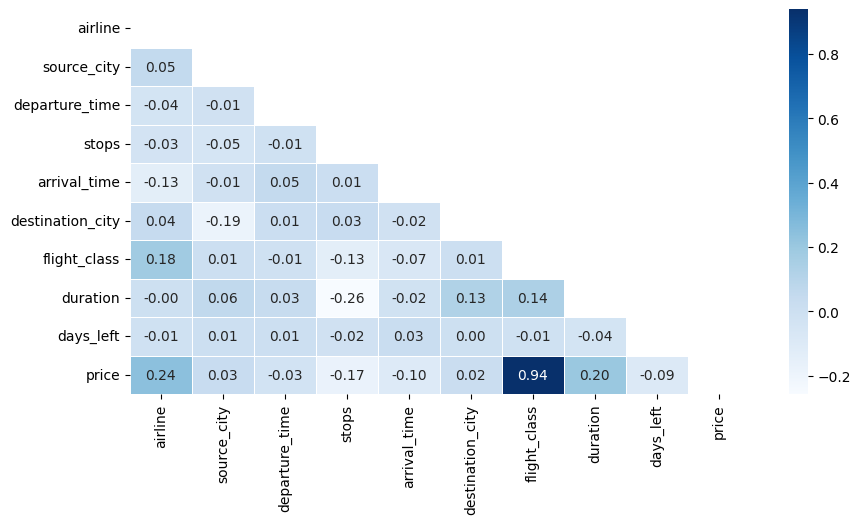

In [61]:
corr = data.corr()
plt.figure(figsize=(10, 5))
sns.heatmap(corr, annot=True, fmt='.2f', linewidths=0.5, linecolor='white', mask=np.triu(corr), cmap='Blues')
plt.show()

Flight classes is most relevant feature to Price.

Interpretation:

- The heatmap visually represents the correlation matrix corr, where each cell's color and annotation indicate the strength and direction of correlation between pairs of variables in the dataset (data).
- Positive correlations are typically represented by lighter shades (towards white or blue depending on intensity), while negative correlations are represented by darker shades.
- The annotation (annot=True) provides the exact correlation coefficient for each pair of variables, making it easier to identify strong correlations (either positive or negative).

This visualization helps in quickly identifying which pairs of variables are highly correlated, which can indicate potential multicollinearity issues in the dataset.

Flight classes is most relevant feature to Price.

### separating dataset
Separating generally refers to extracting specific parts or features of a dataset, often to distinguish between input features and target variables.

Here, separating features (X) from the target variable (y) in supervised learning tasks, where X contains independent variables used for prediction, and y contains the dependent variable to be predicted.

In [62]:
X_temp = data.drop(columns='price')
y = data.price

In [63]:
scaler = MinMaxScaler().fit_transform(X_temp)
X = pd.DataFrame(scaler, columns=X_temp.columns)

By applying MinMaxScaler and converting the scaled data back to a DataFrame, you prepare your dataset (X) for use in machine learning models, ensuring that the data is appropriately scaled and structured for accurate and efficient model training.

In [66]:
# remove rows from the DataFrame X where any of the values are missing (NaN)
X.dropna()

,airline,source_city,departure_time,stops,arrival_time,destination_city,flight_class,duration,days_left
0,0.8,0.0,0.4,0.5,0.0,0.0,0.0,0.027347,0.0
1,0.8,0.0,0.2,0.5,0.4,0.0,0.0,0.030612,0.0
2,0.0,0.0,0.2,0.5,0.8,0.0,0.0,0.027347,0.0
3,1.0,0.0,0.0,0.5,0.6,0.0,0.0,0.028980,0.0
4,1.0,0.0,0.0,0.5,0.4,0.0,0.0,0.030612,0.0
...,...,...,...,...,...,...,...,...,...
299837,1.0,1.0,0.0,0.0,0.2,0.8,1.0,0.188776,1.0
299838,1.0,1.0,0.8,0.0,0.0,0.8,1.0,0.195714,1.0
299839,1.0,1.0,0.2,0.0,0.0,0.8,1.0,0.265306,1.0
299840,1.0,1.0,0.2,0.0,0.2,0.8,1.0,0.187143,1.0


In [67]:
# visually highlight key statistics across features with different colors, making it easier to identify trends, variations, and potential outliers in the data.
X.describe().T[['min', 'mean', 'std', '50%', 'max']].style.background_gradient(axis=1)

,min,mean,std,50%,max
airline,0.000000,0.620851,0.366624,0.600000,1.000000
source_city,0.000000,0.440503,0.336958,0.400000,1.000000
departure_time,0.000000,0.358910,0.280411,0.400000,1.000000
stops,0.000000,0.104245,0.251729,0.000000,1.000000
arrival_time,0.000000,0.299821,0.281618,0.200000,1.000000
destination_city,0.000000,0.453661,0.337728,0.400000,1.000000
flight_class,0.000000,0.310757,0.462804,0.000000,1.000000
duration,0.000000,0.232354,0.146749,0.212653,1.000000
days_left,0.000000,0.521406,0.282234,0.520833,1.000000


### Detect duplicates

In [68]:
duplicate_rows = data[data.duplicated()]

# Display duplicate rows if any
if not duplicate_rows.empty:
    print("Duplicate rows found:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

Duplicate rows found:
        airline  source_city  departure_time  stops  arrival_time  \
10            2            1               5      2             2   
121           5            1               1      2             3   
213           3            1               5      1             1   
232           3            1               2      2             3   
880           3            3               3      2             1   
...         ...          ...             ...    ...           ...   
298284        5            1               3      2             1   
298382        5            2               3      2             1   
298573        5            2               1      1             2   
298730        5            3               2      2             3   
298733        5            3               3      2             1   

        destination_city  flight_class  duration  days_left  price  
10                     1             1      2.25          1   5954  
121        

In [69]:
# Count duplicates
duplicate_count = data.duplicated().sum()

print("Number of duplicate records:", duplicate_count)

Number of duplicate records: 2212


In [70]:
# Remove duplicates and update the DataFrame
data.drop_duplicates(inplace=True)

# Save the updated DataFrame back to the original file
data.to_csv('clean_dataset.csv', index=False)

print("Duplicates removed and updated file saved successfully.")

Duplicates removed and updated file saved successfully.


In [71]:
data.shape

(297630, 10)

# Feature Selection
#### Data Splitting

In [72]:
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(score_func=f_classif, k=5)
new_data = selector.fit_transform(X, y)

In [73]:
selected_features = X.columns[selector.get_support(indices=True)]
print(selected_features)

Index(['airline', 'source_city', 'stops', 'destination_city', 'flight_class'], dtype='object')


In [74]:
new_df = pd.DataFrame(new_data, columns=selected_features)
new_df['price'] = y.reset_index(drop=True)

Data Integration: By combining new_data with the target variable y, the code creates a unified dataset (new_df) that includes both the features (selected_features) and their corresponding target values (price).

In [75]:
new_df.head()

,airline,source_city,stops,destination_city,flight_class,price
0,0.8,0.0,0.5,0.0,0.0,5953
1,0.8,0.0,0.5,0.0,0.0,5953
2,0.0,0.0,0.5,0.0,0.0,5956
3,1.0,0.0,0.5,0.0,0.0,5955
4,1.0,0.0,0.5,0.0,0.0,5955


### Data Modeling

In [76]:
new_df_X = new_df.drop(columns='price')
new_df_y = new_df.price

In [77]:
# Split new_df into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(new_df_X, new_df_y, test_size=0.2, random_state=0)

In [78]:
a={'Model Name':[], 'Mean_Absolute_Error_MAE':[] ,'Adj_R_Square':[] ,'Root_Mean_Squared_Error_RMSE':[] ,'Mean_Absolute_Percentage_Error_MAPE':[] ,'Mean_Squared_Error_MSE':[] ,'Root_Mean_Squared_Log_Error_RMSLE':[] ,'R2_score':[]}
Results=pd.DataFrame(a)
Results.head()

,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score


In [79]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, BaggingRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

# Initialize an empty DataFrame for results
Results = pd.DataFrame()

# Create models with default parameters
modelmlg = LinearRegression()
modeldcr = DecisionTreeRegressor()
modelbag = BaggingRegressor()
modelrfr = RandomForestRegressor()
modelSVR = SVR()
modelXGR = xgb.XGBRegressor()
modelKNN = KNeighborsRegressor(n_neighbors=5)
modelETR = ExtraTreesRegressor()
modelRE = Ridge()
modelLO = Lasso(alpha=0.1)

modelGBR = GradientBoostingRegressor(
    loss='absolute_error', learning_rate=0.1, n_estimators=100, subsample=1.0,
    criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1,
    max_depth=3, random_state=None, max_features=None, alpha=0.9, tol=0.0001
)

# List of models
MM = [modelmlg, modeldcr, modelrfr, modelKNN, modelETR, modelGBR, modelXGR, modelbag, modelRE, modelLO]

for model in MM:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    print('Model Name:', model)
    print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred), 3))
    print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred), 3))
    print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), 3))
    print('R2_score:', round(metrics.r2_score(y_test, y_pred), 6))
    print('Root Mean Squared Log Error (RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))), 3))

    def MAPE(y_test, y_pred):
        y_test, y_pred = np.array(y_test), np.array(y_pred)
        return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

    result = MAPE(y_test, y_pred)
    print('Mean Absolute Percentage Error (MAPE):', round(result, 2), '%')

    r_squared = metrics.r2_score(y_test, y_pred)
    adjusted_r_squared = 1 - (1 - r_squared) * (len(y_test) - 1) / (len(y_test) - x_train.shape[1] - 1)
    print('Adj R Square:', round(adjusted_r_squared, 6))
    print('-' * 100)

    new_row = pd.DataFrame({
        'Model Name': [str(model)],
        'Mean_Absolute_Error_MAE': [metrics.mean_absolute_error(y_test, y_pred)],
        'Adj_R_Square': [adjusted_r_squared],
        'Root_Mean_Squared_Error_RMSE': [np.sqrt(metrics.mean_squared_error(y_test, y_pred))],
        'Mean_Absolute_Percentage_Error_MAPE': [result],
        'Mean_Squared_Error_MSE': [metrics.mean_squared_error(y_test, y_pred)],
        'Root_Mean_Squared_Log_Error_RMSLE': [np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))],
        'R2_score': [r_squared]
    })

    Results = pd.concat([Results, new_row], ignore_index=True)


Model Name: LinearRegression()
Mean Absolute Error (MAE): 4884.882
Mean Squared Error (MSE): 56911199.634
Root Mean Squared Error (RMSE): 7543.951
R2_score: 0.889362
Root Mean Squared Log Error (RMSLE): 8.929
Mean Absolute Percentage Error (MAPE): 43.77 %
Adj R Square: 0.889352
----------------------------------------------------------------------------------------------------
Model Name: DecisionTreeRegressor()
Mean Absolute Error (MAE): 3320.542
Mean Squared Error (MSE): 26794573.171
Root Mean Squared Error (RMSE): 5176.347
R2_score: 0.94791
Root Mean Squared Log Error (RMSLE): 8.552
Mean Absolute Percentage Error (MAPE): 29.92 %
Adj R Square: 0.947906
----------------------------------------------------------------------------------------------------
Model Name: RandomForestRegressor()
Mean Absolute Error (MAE): 3320.498
Mean Squared Error (MSE): 26790270.653
Root Mean Squared Error (RMSE): 5175.932
R2_score: 0.947918
Root Mean Squared Log Error (RMSLE): 8.552
Mean Absolute Percenta

In [80]:
Results

,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score
0,LinearRegression(),4884.881810,0.889352,7543.951195,43.769676,5.691120e+07,8.928501,0.889362
1,DecisionTreeRegressor(),3320.541542,0.947906,5176.347474,29.920826,2.679457e+07,8.551855,0.947910
2,RandomForestRegressor(),3320.498317,0.947914,5175.931863,29.927436,2.679027e+07,8.551775,0.947918
3,KNeighborsRegressor(),3603.977388,0.937428,5673.052449,31.042804,3.218352e+07,8.643483,0.937434
4,ExtraTreesRegressor(),3320.288250,0.947917,5175.795155,29.918724,2.678886e+07,8.551748,0.947921
5,GradientBoostingRegressor(loss='absolute_error'),3628.660356,0.932473,5893.406173,26.031410,3.473224e+07,8.681589,0.932479
6,"XGBRegressor(base_score=None, booster=None, ca...",3323.443031,0.947900,5176.641498,29.996029,2.679762e+07,8.551912,0.947904
7,BaggingRegressor(),3320.679415,0.947899,5176.655685,29.889640,2.679776e+07,8.551915,0.947904
8,Ridge(),4884.933643,0.889353,7543.950825,43.771456,5.691119e+07,8.928501,0.889362
9,Lasso(alpha=0.1),4884.831709,0.889352,7543.953256,43.768948,5.691123e+07,8.928502,0.889362


In [81]:
models=['LinearRegression','DecisionTreeRegressor','RandomForestRegressor','KNeighborsRegressor','ExtraTreesRegressor','GradientBoostingRegressor','XGBRegressor','BaggingRegressor','Ridge Regression','Lasso Regression']
result=pd.DataFrame({'Model_Name':models})
result['Adj_R_Square']=Results['Adj_R_Square']
result['Mean_Absolute_Error_MAE']=Results['Mean_Absolute_Error_MAE']
result['Root_Mean_Squared_Error_RMSE']=Results['Root_Mean_Squared_Error_RMSE']
result['Mean_Absolute_Percentage_Error_MAPE']=Results['Mean_Absolute_Percentage_Error_MAPE']
result['Mean_Squared_Error_MSE']=Results['Mean_Squared_Error_MSE']
result['Root_Mean_Squared_Log_Error_RMSLE']=Results['Root_Mean_Squared_Log_Error_RMSLE']
result['R2_score']=Results['R2_score']
result=result.sort_values(by='Adj_R_Square',ascending=False).reset_index(drop=True)
result

,Model_Name,Adj_R_Square,Mean_Absolute_Error_MAE,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score
0,ExtraTreesRegressor,0.947917,3320.288250,5175.795155,29.918724,2.678886e+07,8.551748,0.947921
1,RandomForestRegressor,0.947914,3320.498317,5175.931863,29.927436,2.679027e+07,8.551775,0.947918
2,DecisionTreeRegressor,0.947906,3320.541542,5176.347474,29.920826,2.679457e+07,8.551855,0.947910
3,XGBRegressor,0.947900,3323.443031,5176.641498,29.996029,2.679762e+07,8.551912,0.947904
4,BaggingRegressor,0.947899,3320.679415,5176.655685,29.889640,2.679776e+07,8.551915,0.947904
5,KNeighborsRegressor,0.937428,3603.977388,5673.052449,31.042804,3.218352e+07,8.643483,0.937434
6,GradientBoostingRegressor,0.932473,3628.660356,5893.406173,26.031410,3.473224e+07,8.681589,0.932479
7,Ridge Regression,0.889353,4884.933643,7543.950825,43.771456,5.691119e+07,8.928501,0.889362
8,LinearRegression,0.889352,4884.881810,7543.951195,43.769676,5.691120e+07,8.928501,0.889362
9,Lasso Regression,0.889352,4884.831709,7543.953256,43.768948,5.691123e+07,8.928502,0.889362


In [82]:
#Trainig the model with
modelETR.fit(x_train, y_train)

# Predict the model with test data

y_pred = modeldcr.predict(x_test)

In [83]:
out=pd.DataFrame({'Price_actual':y_test,'Price_pred':y_pred})
result=data.merge(out,left_index=True,right_index=True)

In [84]:
result.sample(10)

,airline,source_city,departure_time,stops,arrival_time,destination_city,flight_class,duration,days_left,price,Price_actual,Price_pred
174681,2,4,3,1,6,3,1,7.08,30,6109,6109,7095.338858
40856,3,6,5,2,2,2,1,2.75,9,8192,8192,4937.895425
165342,1,1,3,2,1,1,1,2.25,29,2476,2476,3449.628571
238344,5,2,1,1,1,6,1,9.83,40,4348,4348,6621.918437
9837,1,6,5,1,3,3,2,20.25,3,45905,45905,56631.616216
28861,5,4,1,1,3,6,1,23.67,7,14620,14620,9178.651264
283475,3,3,1,2,4,1,1,1.75,47,2201,2201,3375.549419
158859,3,1,2,1,2,1,1,8.67,28,3546,3546,5072.038874
105360,5,2,3,1,1,3,2,5.75,19,62448,62448,66525.667360
234646,5,1,5,1,1,1,2,6.50,39,53164,53164,50137.426529


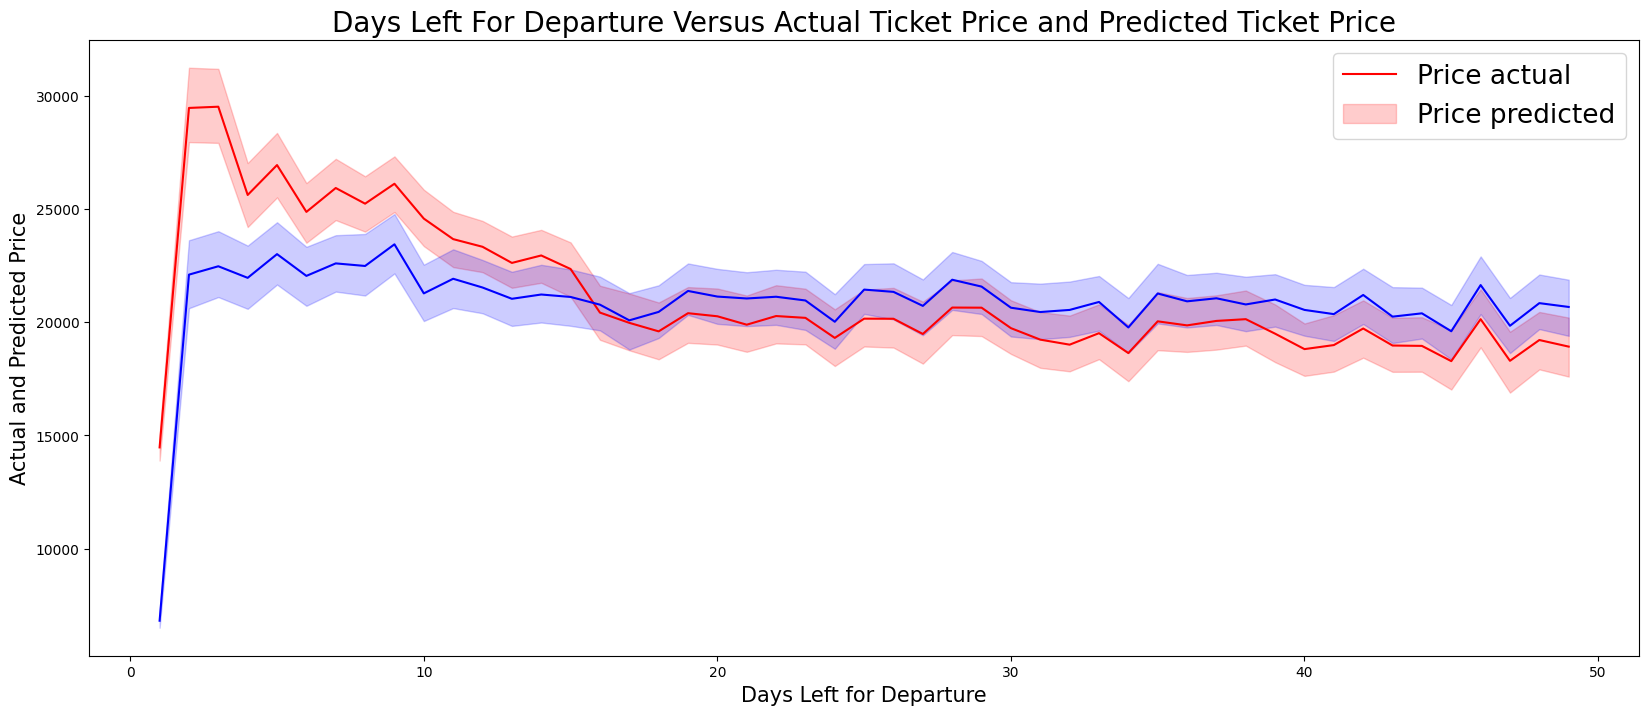

In [85]:
plt.figure(figsize=(20,8))
sns.lineplot(data=result,x='days_left',y='Price_actual',color='red')
sns.lineplot(data=result,x='days_left',y='Price_pred',color='blue')
plt.title('Days Left For Departure Versus Actual Ticket Price and Predicted Ticket Price',fontsize=20)
plt.legend(labels=['Price actual','Price predicted'],fontsize=19)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Actual and Predicted Price',fontsize=15)
plt.show()

Here i have uses matplotlib and seaborn libraries to create a line plot.
This plot provides a clear visual representation of how well the model predicts ticket prices compared to actual prices over varying days left for departure, aiding in model evaluation and interpretation of results.

Purpose:

- Visualization: This plot visualizes how the actual ticket prices (Price_actual) and predicted ticket prices (Price_pred) vary with the number of days left for departure (days_left).

- Comparison: By plotting both actual and predicted prices on the same graph, it allows for a direct comparison to assess how well the model predicts ticket prices across different time frames before departure.

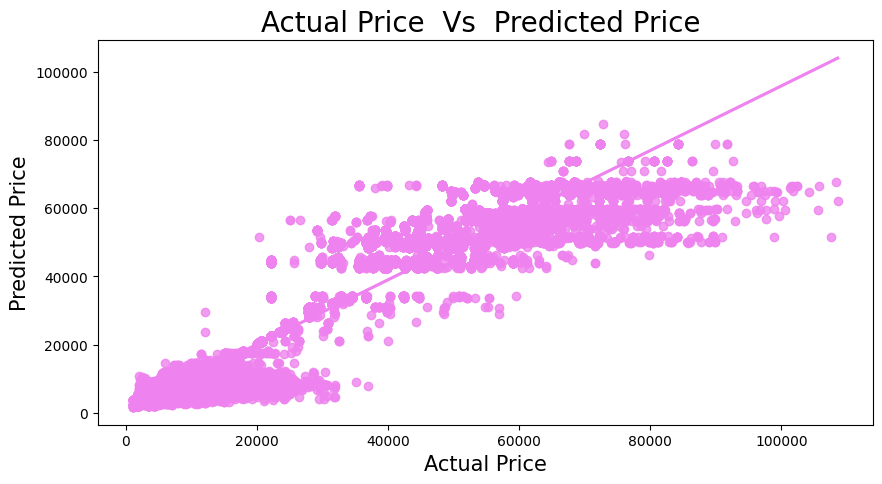

In [87]:
plt.figure(figsize=(10,5))
sns.regplot(x='Price_actual',y='Price_pred',data=result,color='violet')
plt.title('Actual Price  Vs  Predicted Price ',fontsize=20)
plt.xlabel('Actual Price',fontsize=15)
plt.ylabel('Predicted Price',fontsize=15)
plt.show()

Purpose:

Visualization of Model Performance: This plot visualizes how well the predicted ticket prices (Price_pred) align with the actual ticket prices (Price_actual). The regression line indicates the overall trend and relationship between these two variables.

Interpretation: 
Ideally, in a well-performing model, the scatter plot points should closely follow the diagonal line (regression line), indicating that predicted prices closely match the actual prices. Deviations from this line suggest potential areas where the model underestimates or overestimates ticket prices.

In [88]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Example input data for prediction (as a tuple)
input_data = ('SpiceJet', 'Delhi', 'zero', 'Mumbai', 'Economy')

# Example categorical columns indices
categorical_features_indices = [0, 1, 2, 3, 4]  # Assuming all are categorical features

# Initialize LabelEncoders for each categorical feature
label_encoders = [LabelEncoder() for _ in categorical_features_indices]

# Fit each LabelEncoder and transform corresponding feature in input_data
input_data_transformed = []
for i, encoder in enumerate(label_encoders):
    transformed_feature = encoder.fit_transform([input_data[i]])
    input_data_transformed.append(transformed_feature[0])

# Convert transformed data to numpy array
input_data_transformed = np.asarray(input_data_transformed).reshape(1, -1)


prediction = modelETR.predict(input_data_transformed)
print(prediction)


[4029.07359307]


C:\Users\Vipin Das\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


# Hyperparameter Tuning

#### GridSearchCV
Grid search is an exhaustive search technique that evaluates a model's performance for every possible combination of hyperparameter values specified in a grid.

In [90]:
# This dictionary defines the structure of the DataFrame new_stuff. Each key in the dictionary represents a column name, and the corresponding empty list [] indicates that these columns initially contain no data.
a={'Model Name':[], 
   'Mean_Absolute_Error_MAE':[] ,
   'Adj_R_Square':[] ,
   'Root_Mean_Squared_Error_RMSE':[] ,
   'Mean_Absolute_Percentage_Error_MAPE':[] ,
   'Mean_Squared_Error_MSE':[] ,'Root_Mean_Squared_Log_Error_RMSLE':[] ,
   'R2_score':[], 
   'Best_parameter':[]}

# Creating new_stuff DataFrame:
new_stuff=pd.DataFrame(a)
new_stuff.head()

,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score,Best_parameter


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, BaggingRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

# Initialize an empty DataFrame for results
new_stuff = pd.DataFrame()

# Assuming x_train, x_test, y_train, y_test are defined earlier

# Create models with default parameters
modelmlg = LinearRegression()
modeldcr = DecisionTreeRegressor()
modelbag = BaggingRegressor()
modelrfr = RandomForestRegressor()
modelSVR = SVR()
modelXGR = xgb.XGBRegressor()
modelKNN = KNeighborsRegressor()
modelETR = ExtraTreesRegressor()
modelRE = Ridge()
modelLO = Lasso()
modelGBR = GradientBoostingRegressor()

# List of models with parameter grids for hyperparameter tuning
MM = [
    ('Linear Regression', modelmlg, {}),
    ('Decision Tree', modeldcr, {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}),
    ('Random Forest', modelrfr, {'n_estimators': [100, 200, 300],  'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}),
    ('KNN', modelKNN, {'n_neighbors': [3, 5, 7, 10, 15], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}),
    ('Extra Trees', modelETR, {'n_estimators': [100, 200, 300],  'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}),
    ('Gradient Boosting', modelGBR, {'learning_rate': [0.1, 0.05, 0.02], 'n_estimators': [50, 100, 200], 'max_depth': [3, 4, 5], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}),
    ('XGBoost', modelXGR, {'learning_rate': [0.1, 0.05, 0.02], 'n_estimators': [50, 100, 200], 'max_depth': [3, 4, 5], 'min_child_weight': [1, 2, 3]}),
    ('Bagging', modelbag, {'n_estimators': [10, 20, 30, 40, 50], 'max_samples': [0.5, 0.7, 1.0], 'max_features': [0.5, 0.7, 1.0]}),
    ('Ridge', modelRE, {'alpha': [0.1, 0.5, 1.0, 2.0]}),
    ('Lasso', modelLO, {'alpha': [0.1, 0.5, 1.0, 2.0]})
]

for name, model, params in MM:
    grid_search = GridSearchCV(estimator=model, param_grid=params, scoring='neg_mean_squared_error', cv=5)
    grid_search.fit(x_train, y_train)
    best_model = grid_search.best_estimator_

    y_pred = best_model.predict(x_test)

    print('Model Name:', name)
    print('Best Parameters:', grid_search.best_params_)
    print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred), 3))
    print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred), 3))
    print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), 3))
    print('R2_score:', round(metrics.r2_score(y_test, y_pred), 6))
    print('Root Mean Squared Log Error (RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))), 3))
    print('Best Parameter: ', best_model)

    def MAPE(y_test, y_pred):
        y_test, y_pred = np.array(y_test), np.array(y_pred)
        return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

    result = MAPE(y_test, y_pred)
    print('Mean Absolute Percentage Error (MAPE):', round(result, 2), '%')

    r_squared = metrics.r2_score(y_test, y_pred)
    adjusted_r_squared = 1 - (1 - r_squared) * (len(y_test) - 1) / (len(y_test) - x_train.shape[1] - 1)
    print('Adj R Square:', round(adjusted_r_squared, 6))
    print('-' * 100)

    new_row = pd.DataFrame({
        'Model Name': [name],
        'Mean_Absolute_Error_MAE': [metrics.mean_absolute_error(y_test, y_pred)],
        'Adj_R_Square': [adjusted_r_squared],
        'Root_Mean_Squared_Error_RMSE': [np.sqrt(metrics.mean_squared_error(y_test, y_pred))],
        'Mean_Absolute_Percentage_Error_MAPE': [result],
        'Mean_Squared_Error_MSE': [metrics.mean_squared_error(y_test, y_pred)],
        'Root_Mean_Squared_Log_Error_RMSLE': [np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))],
        'R2_score': [r_squared],
        'Best_parameter': [str(grid_search.best_params_)]
    })

    new_stuff = pd.concat([new_stuff, new_row], ignore_index=True)


Model Name: Linear Regression
Best Parameters: {}
Mean Absolute Error (MAE): 4884.882
Mean Squared Error (MSE): 56911199.634
Root Mean Squared Error (RMSE): 7543.951
R2_score: 0.889362
Root Mean Squared Log Error (RMSLE): 8.929
Best Parameter:  LinearRegression()
Mean Absolute Percentage Error (MAPE): 43.77 %
Adj R Square: 0.889352
----------------------------------------------------------------------------------------------------
Model Name: Decision Tree
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5}
Mean Absolute Error (MAE): 3320.542
Mean Squared Error (MSE): 26794573.171
Root Mean Squared Error (RMSE): 5176.347
R2_score: 0.94791
Root Mean Squared Log Error (RMSLE): 8.552
Best Parameter:  DecisionTreeRegressor(max_depth=20, min_samples_split=5)
Mean Absolute Percentage Error (MAPE): 29.92 %
Adj R Square: 0.947906
----------------------------------------------------------------------------------------------------


In [ ]:
new_stuff

#### RandomSearchCV

In [ ]:
a={'Model Name':[], 'Mean_Absolute_Error_MAE':[] ,'Adj_R_Square':[] ,'Root_Mean_Squared_Error_RMSE':[] ,'Mean_Absolute_Percentage_Error_MAPE':[] ,'Mean_Squared_Error_MSE':[] ,'Root_Mean_Squared_Log_Error_RMSLE':[] ,'R2_score':[], 'Best_parameter':[]}
random=pd.DataFrame(a)
random.head()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, BaggingRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

# Initialize an empty DataFrame for results
Results = pd.DataFrame()

# Assuming x_train, x_test, y_train, y_test are defined earlier

# Create models with default parameters
modelmlg = LinearRegression()
modeldcr = DecisionTreeRegressor()
modelbag = BaggingRegressor()
modelrfr = RandomForestRegressor()
modelSVR = SVR()
modelXGR = xgb.XGBRegressor()
modelKNN = KNeighborsRegressor()
modelETR = ExtraTreesRegressor()
modelRE = Ridge()
modelLO = Lasso()
modelGBR = GradientBoostingRegressor()

# List of models with parameter grids for hyperparameter tuning
MM = [
    ('Linear Regression', modelmlg, {}),
    ('Decision Tree', modeldcr, {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}),
    ('Random Forest', modelrfr, {'n_estimators': [100, 200, 300],  'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}),
    ('KNN', modelKNN, {'n_neighbors': [3, 5, 7, 10, 15], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}),
    ('Extra Trees', modelETR, {'n_estimators': [100, 200, 300],  'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}),
    ('Gradient Boosting', modelGBR, {'learning_rate': [0.1, 0.05, 0.02], 'n_estimators': [50, 100, 200], 'max_depth': [3, 4, 5], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}),
    ('XGBoost', modelXGR, {'learning_rate': [0.1, 0.05, 0.02], 'n_estimators': [50, 100, 200], 'max_depth': [3, 4, 5], 'min_child_weight': [1, 2, 3]}),
    ('Bagging', modelbag, {'n_estimators': [10, 20, 30, 40, 50], 'max_samples': [0.5, 0.7, 1.0], 'max_features': [0.5, 0.7, 1.0]}),
    ('Ridge', modelRE, {'alpha': [0.1, 0.5, 1.0, 2.0]}),
    ('Lasso', modelLO, {'alpha': [0.1, 0.5, 1.0, 2.0]})
]

for name, model, params in MM:
    random_search = RandomizedSearchCV(estimator=model, param_distributions=params, scoring='neg_mean_squared_error', cv=5, n_iter=5, random_state=42)
    random_search.fit(x_train, y_train)
    best_model = random_search.best_estimator_

    y_pred = best_model.predict(x_test)

    print('Model Name:', name)
    print('Best Parameters:', random_search.best_params_)
    print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred), 3))
    print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred), 3))
    print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), 3))
    print('R2_score:', round(metrics.r2_score(y_test, y_pred), 6))
    print('Root Mean Squared Log Error (RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))), 3))
    print('Best Parameter: ', best_model)

    def MAPE(y_test, y_pred):
        y_test, y_pred = np.array(y_test), np.array(y_pred)
        return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

    result = MAPE(y_test, y_pred)
    print('Mean Absolute Percentage Error (MAPE):', round(result, 2), '%')

    r_squared = metrics.r2_score(y_test, y_pred)
    adjusted_r_squared = 1 - (1 - r_squared) * (len(y_test) - 1) / (len(y_test) - x_train.shape[1] - 1)
    print('Adj R Square:', round(adjusted_r_squared, 6))
    print('-' * 100)

    new_row = pd.DataFrame({
        'Model Name': [name],
        'Mean_Absolute_Error_MAE': [metrics.mean_absolute_error(y_test, y_pred)],
        'Adj_R_Square': [adjusted_r_squared],
        'Root_Mean_Squared_Error_RMSE': [np.sqrt(metrics.mean_squared_error(y_test, y_pred))],
        'Mean_Absolute_Percentage_Error_MAPE': [result],
        'Mean_Squared_Error_MSE': [metrics.mean_squared_error(y_test, y_pred)],
        'Root_Mean_Squared_Log_Error_RMSLE': [np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))],
        'R2_score': [r_squared],
        'Best_parameter': [str(random_search.best_params_)]
    })

    random = pd.concat([random, new_row], ignore_index=True)
